<a href="https://colab.research.google.com/github/Ravi-ranjan1801/ML-Lab/blob/main/lab_4_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Results for c = 3.814697265625e-06 ---
Degree     RMSE            Coeff Mag (|w|)     
1          4.1535          3.4053              
2          1.2004          2.1172              
3          1.1657          2.5794              
4          0.0000          6.1112              
5          0.0000          1.5144              
6          0.0000          1.0767              
7          0.0000          0.8416              
8          0.0000          0.8259              
9          0.8837          0.0351              
10         0.8837          0.0351              

--- Results for c = 262144 ---
Degree     RMSE            Coeff Mag (|w|)     
1          12.0143         15.9966             
2          11.8261         15.7816             
3          5.4578          9.7541              
4          3.4920          7.0036              
5          2.9958          6.4312              
6          2.6661          5.3618              
7          2.1853          4.9784              
8          2

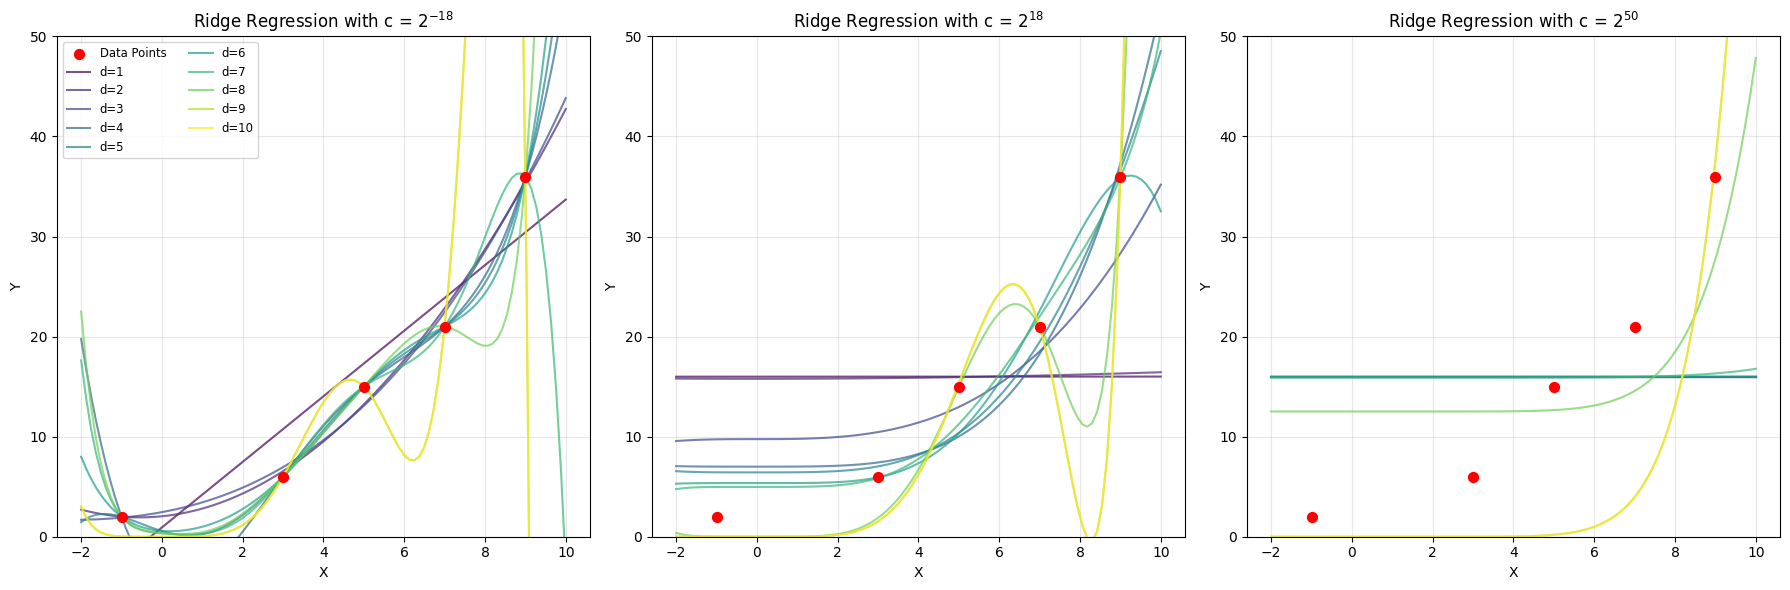

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X_raw = np.array([-1, 3, 5, 7, 9])
Y_raw = np.array([2, 6, 15, 21, 36])

degrees = range(1, 11)
c_values = [2**(-18), 2**(18), 2**(50)]

X_smooth = np.linspace(min(X_raw)-1, max(X_raw)+1, 100)

def polynomial_ridge_regression(x_train, y_train, degree, c_param):
    X_poly = np.vander(x_train, degree + 1, increasing=True)
    I = np.eye(degree + 1)
    I[0, 0] = 0
    w = np.linalg.pinv(X_poly.T @ X_poly + c_param * I) @ X_poly.T @ y_train
    return w

def predict(x_input, weights):
    degree = len(weights) - 1
    X_poly = np.vander(x_input, degree + 1, increasing=True)
    return X_poly @ weights

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

plt.figure(figsize=(18, 6))

for idx, c in enumerate(c_values):
    plt.subplot(1, 3, idx + 1)
    plt.scatter(X_raw, Y_raw, color='red', label='Data Points', s=50, zorder=5)

    print(f"\n--- Results for c = {c} ---")
    print(f"{'Degree':<10} {'RMSE':<15} {'Coeff Mag (|w|)':<20}")

    colors = plt.cm.viridis(np.linspace(0, 1, len(degrees)))

    for i, d in enumerate(degrees):
        weights = polynomial_ridge_regression(X_raw, Y_raw, d, c)
        y_pred_train = predict(X_raw, weights)
        rmse = calculate_rmse(Y_raw, y_pred_train)
        coeff_mag = np.linalg.norm(weights)

        print(f"{d:<10} {rmse:<15.4f} {coeff_mag:<20.4f}")

        y_smooth = predict(X_smooth, weights)
        plt.plot(X_smooth, y_smooth, color=colors[i], alpha=0.7, linewidth=1.5, label=f'd={d}')

    plt.title(f'Ridge Regression with c = $2^{{{int(np.log2(c))}}}$')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.ylim(0, 50)
    if idx == 0:
        plt.legend(ncol=2, fontsize='small', loc='upper left')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()